<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/Robor_3Dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as m
import csv
import pandas as pd
from numpy.lib.function_base import append
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Tạo dữ liệu
l1 = 50 
l2 = 40 
l3 = 20 
x_train = []
y_train = []
data=[]
a = []
for t1 in range(0, 180, 2): 
  for t2 in range(0, 180, 2):
 
    t3 = 90-t2-t1
    px = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2)) + l3*m.cos(m.radians(t1+t2+t3))
    py = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2)) + l3*m.sin(m.radians(t1+t2+t3))
    t1 = t1/180.0
    t2 = t2/180.0
    t3 = (t3+180.0)/360.0
    px = (px+110)/220
    py = (py+110)/220
    a.append(np.array((t1, t2, t3, px, py)))
  data.extend(a)

In [ ]:
header = ['t1', 't2', 't3', 'Px', 'Py']
with open('robot_3_dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(header)
    writer.writerows(data)

data=pd.read_csv('robot_3_dof.csv')
x=np.array(data.drop(['t1','t2','t3'],axis=1)) 
y=np.array(data[['t1','t2','t3',]]) 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape

(294840, 2)

In [ ]:
model = Sequential() 
model.add(Dense(64, activation='relu', input_shape = (2,))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3)) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                192       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc']) 
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.2)

Epoch 1/20
7371/7371 [==============================] - 19s 2ms/step - loss: 0.0021 - acc: 0.9948 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 2/20
7371/7371 [==============================] - 18s 2ms/step - loss: 0.0020 - acc: 0.9954 - val_loss: 0.0019 - val_acc: 0.9885
Epoch 3/20
7371/7371 [==============================] - 20s 3ms/step - loss: 0.0019 - acc: 0.9951 - val_loss: 0.0017 - val_acc: 0.9884
Epoch 4/20
7371/7371 [==============================] - 21s 3ms/step - loss: 0.0017 - acc: 0.9936 - val_loss: 0.0014 - val_acc: 0.9881
Epoch 5/20
7371/7371 [==============================] - 21s 3ms/step - loss: 0.0016 - acc: 0.9938 - val_loss: 7.3780e-04 - val_acc: 0.9883
Epoch 6/20
7371/7371 [==============================] - 18s 2ms/step - loss: 0.0016 - acc: 0.9942 - val_loss: 0.0014 - val_acc: 0.9999
Epoch 7/20
7371/7371 [==============================] - 19s 3ms/step - loss: 0.0015 - acc: 0.9947 - val_loss: 0.0013 - val_acc: 0.9884
Epoch 8/20
7371/7371 [=============================

In [ ]:
model.save('Robot_3Dof.h5')

Sai số kiểm tra là:  0.001323009142652154
Độ chính xác kiểm tra là:  0.9887396693229675


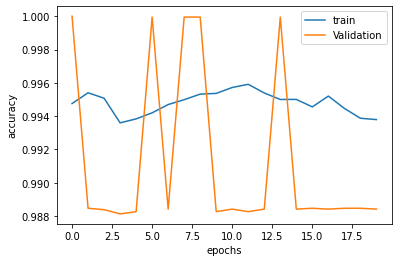

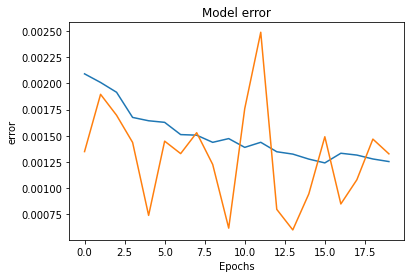

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()
#báo lỗi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()